In [457]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [582]:
import pandas as pd
from sklearn.model_selection import train_test_split
from os import path

import re

from deep4deep.text_retrieval import prepare_my_df, get_meta_description_columns,get_meta_description,get_dealroom_meta_description
from deep4deep.text_processing import text_preprocessing, remove_special_chars, remove_punctuation
from deep4deep.w2v_embedding_and_rnn_model import Preprocessor, Embedder, LstmModel
from deep4deep import utils_w2v_rnn
from deep4deep.utils import simple_time_tracker

from deep4deep.trainer import LSTM_Meta_Trainer, merge_df

from deep4deep.description_dataframe_preparation import data_prep, change_to_categorical
from deep4deep.trainer import LSTM_Meta_Trainer

In [379]:
embedder, preprocessor

(<deep4deep.trainer.LSTM_Meta_Trainer at 0x14689d790>,
 Embedder(),
 Preprocessor())

In [417]:
df_meta_from_dataprep = description_dataframe_preparation.data_prep()

data_prep 0.03


In [390]:
df.head(1)

,id,name,path,tagline,about,url,website_url,twitter_url,facebook_url,linkedin_url,...,employee_12_months_growth_delta,kpi_summary,team,investors,fundings,traffic,similarweb_chart,job_openings,deep_or_not,target
0,1742681,Healthcardionexion.com,healthcardionexion_com,The CardioNexion medical device helps prevent ...,NaN,https://app.dealroom.co/companies/healthcardio...,http://healthcardionexion.com,https://twitter.com/health_cardio,NaN,https://www.linkedin.com/company/--health,...,NaN,"{'id': 1781619, 'last_update_date': '2020-07-1...","{'items': [{'id': 1989838, 'name': 'Pierre Goi...","{'items': [], 'total': 0}","{'items': [{'id': 325238, 'year': 2017, 'month...","{'visitors': '0', 'annual_growth': None, 'sour...","[{'date': '2018-12-01', 'value': 162}, {'date'...",0,deeptech,1.0


In [ ]:
recu_train, recu_test = train_test_split(df, test_size = .25)
train_set, val_set = train_test_split(recu_train, test_size = .25)

In [519]:
train_set.head(3)

,id,name,path,tagline,about,url,website_url,twitter_url,facebook_url,linkedin_url,...,employee_12_months_growth_delta,kpi_summary,team,investors,fundings,traffic,similarweb_chart,job_openings,deep_or_not,target
907,1248554,Batvoice Technologies,batvoice_technologies,Batvoice Technologies has developed a voice an...,NaN,https://app.dealroom.co/companies/batvoice_tec...,http://www.batvoice.com/,https://twitter.com/batvoicetech,NaN,https://www.linkedin.com/company/batvoice-ai/,...,NaN,"{'id': 1597754, 'last_update_date': '2020-11-0...","{'items': [{'id': 1597417, 'name': 'Eric Bolo'...","{'items': [], 'total': 0}","{'items': [{'id': 382932, 'year': 2017, 'month...","{'visitors': '282', 'annual_growth': 79.617834...","[{'date': '2017-10-01', 'value': 157}, {'date'...",0,non_deeptech,0.0
1415,128063,MyFeelBack,myfeelback,Smart survey technology allowing businesses to...,"MyFeelBack, Feedback Solution et Connaissance ...",https://app.dealroom.co/companies/myfeelback,http://myfeelback.com,https://twitter.com/myfeelback,https://www.facebook.com/myfeelback,https://www.linkedin.com/company/myfeelback,...,-779.0,"{'id': 28265, 'last_update_date': '2020-09-30T...","{'items': [{'id': 37430, 'name': 'Jerome Collo...","{'items': [{'id': 890423, 'name': 'Wiseed', 'p...","{'items': [{'id': 68039, 'year': 2014, 'month'...","{'visitors': '243361', 'annual_growth': 93.539...","[{'date': '2016-12-01', 'value': 125742}, {'da...",2,almost_deeptech,0.5
645,899026,Actimesure,actimesure,ACTIMESURE - Contrôle et métrologie industrielle,NaN,https://app.dealroom.co/companies/actimesure,http://www.actimesure.com,https://twitter.com/actimesure,https://www.facebook.com/actimesure/,https://www.linkedin.com/company/actimesure/,...,434.0,"{'id': 1312187, 'last_update_date': '2019-08-1...","{'items': [], 'total': 0}","{'items': [{'id': 871041, 'name': 'European In...","{'items': [{'id': 44015, 'year': 2016, 'month'...","{'visitors': '17.6536', 'annual_growth': -77.3...","[{'date': '2016-02-01', 'value': 78}, {'date':...",0,non_deeptech,0.0


In [520]:
val_set.head(3)

,id,name,path,tagline,about,url,website_url,twitter_url,facebook_url,linkedin_url,...,employee_12_months_growth_delta,kpi_summary,team,investors,fundings,traffic,similarweb_chart,job_openings,deep_or_not,target
1052,969407,Coating Plasma Industrie,coating_plasma_industrie_cpi_,Plasma surface treatment,NaN,https://app.dealroom.co/companies/coating_plas...,https://www.cpi-plasma.com/,https://twitter.com/cpi_plasma,NaN,https://www.linkedin.com/company/coating-plasm...,...,NaN,"{'id': 913481, 'last_update_date': '2020-01-06...","{'items': [{'id': 1014762, 'name': 'Olivier Br...","{'items': [{'id': 869003, 'name': 'Eurostars S...","{'items': [{'id': 301977, 'year': 2019, 'month...","{'visitors': '188', 'annual_growth': None, 'so...","[{'date': '2017-07-01', 'value': 0}, {'date': ...",0,non_deeptech,0.0
1078,1743092,EASY MOUNTAIN,easy_mountain,Mhikes : Digital solutions for traveler guidance,NaN,https://app.dealroom.co/companies/easy_mountain,http://easy-mountain.com,https://twitter.com/mhikesapp,NaN,https://www.linkedin.com/company/mhikes,...,NaN,"{'id': 1781994, 'last_update_date': '2019-09-1...","{'items': [], 'total': 0}","{'items': [], 'total': 0}","{'items': [], 'total': 0}","{'visitors': '0', 'annual_growth': None, 'sour...","[{'date': '2020-01-01', 'value': 0}, {'date': ...",0,non_deeptech,0.0
99,892057,CryoCapCell,cryocapcell,Develops products in the field of electron mic...,NaN,https://app.dealroom.co/companies/cryocapcell,http://www.cryocapcell.com/,https://twitter.com/gandibar,NaN,https://www.linkedin.com/company/cryocapcell/,...,NaN,"{'id': 6874, 'last_update_date': '2020-10-30T1...","{'items': [{'id': 941069, 'name': 'Xavier Heil...","{'items': [{'id': 16405, 'name': 'Seventure Pa...","{'items': [{'id': 33020, 'year': 2017, 'month'...","{'visitors': '348', 'annual_growth': 3.2640949...","[{'date': '2016-11-01', 'value': 337}, {'date'...",0,deeptech,1.0


In [530]:
lstm_trainer = LSTM_Meta_Trainer()
#lstm_trainer.lstm_training(train_set, val_set)

initializing Trainer
data_prep 0.02
initializing LstmModel
init_and_compile_model 0.03


In [551]:
train_with = merge_df(train_set, lstm_trainer.df_meta_categorical)
val_with = merge_df(val_set, lstm_trainer.df_meta_categorical)
#define my X
X_train_ok = train_with['full_text']
X_val_ok = val_with['full_text']
# keeping a copy with all fields for classification errors examination
X_val_check = val_with.copy().drop(columns=['target'])

In [550]:
train_with.shape, train_with['full_text'].shape

((725, 9), (725,))

In [555]:
# define my y
y_train_ok = train_with['target']
y_val_ok = val_with['target']

#prepare my X
X_train_ok = lstm_trainer.preprocessor.fit_transform(X_train_ok)
X_val_ok = lstm_trainer.preprocessor.transform(X_val_ok)

X_train_ok = lstm_trainer.embedder.fit_transform(X_train_ok)
X_val_ok = lstm_trainer.embedder.transform(X_val_ok)


text_preprocessing 0.01
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_prepr

text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_prepro

text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_prepro

embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text

In [568]:
lstm_trainer.model.fit(X_train_ok, y_train_ok, X_val_ok, y_val_ok)

initializing Preprocessor
downloading class transfer learning embedder – this may take time, coffee break maybe?
initializing Embedder
pad_X 0.13
pad_X 0.02
Epoch 1/500
12/12 [==============================] - 2s 137ms/step - loss: 0.1613 - mae: 0.3283 - mse: 0.1613 - accuracy: 0.7655 - val_loss: 0.1798 - val_mae: 0.3462 - val_mse: 0.1798 - val_accuracy: 0.7590
Epoch 2/500
12/12 [==============================] - 2s 141ms/step - loss: 0.1543 - mae: 0.3209 - mse: 0.1543 - accuracy: 0.7862 - val_loss: 0.1798 - val_mae: 0.3418 - val_mse: 0.1798 - val_accuracy: 0.7390
Epoch 3/500
12/12 [==============================] - 2s 157ms/step - loss: 0.1497 - mae: 0.3124 - mse: 0.1497 - accuracy: 0.8014 - val_loss: 0.1959 - val_mae: 0.3478 - val_mse: 0.1959 - val_accuracy: 0.7149
Epoch 4/500
12/12 [==============================] - 2s 155ms/step - loss: 0.1408 - mae: 0.2991 - mse: 0.1408 - accuracy: 0.8110 - val_loss: 0.1886 - val_mae: 0.3441 - val_mse: 0.1886 - val_accuracy: 0.7430
Epoch 5/500
12/

LstmModel()

In [557]:
X_val_check.shape, X_val_ok.shape, y_val_ok.shape

((249, 8), (249,), (249,))

In [563]:
lstm_trainer.X_val_check = utils_w2v_rnn.make_X_check(X_val_ok, y_val_ok, X_val_check, lstm_trainer.model)

pad_X 0.01
predict 0.18
make_X_check 0.18


accuracy: 75.90 %
precision: 76.15 %
recall: 70.94 %
f1: 73.45 %
Confusion matrix


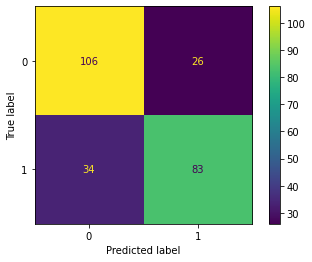

76.0	76.0	71.0	73.0
my_metrics 0.38


{'accuracy': 0.7590361445783133,
 'precision': 0.7614678899082569,
 'recall': 0.7094017094017094,
 'f1': 0.7345132743362831}

In [564]:
utils_w2v_rnn.my_metrics(lstm_trainer.X_val_check)


In [566]:
utils_w2v_rnn.rmse(X_val_ok, y_val_ok, lstm_trainer.model)

pad_X 0.01
predict 0.18
model_rmse: 0.42, vs original_rmse: 0.43 and dummy_rmse:0.50 
rmse 0.18


0.4194903436987162

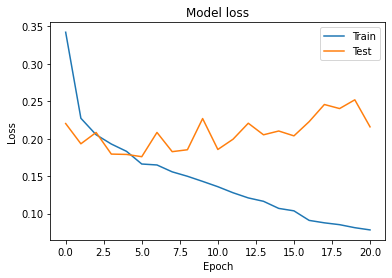

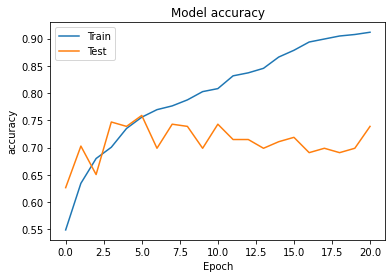

plot_loss_accuracy 0.72


In [567]:
utils_w2v_rnn.plot_loss_accuracy(lstm_trainer.model.history)

In [583]:
# lstm_predict(recu_test)
X_test_from_main_module = recu_test.drop(columns=['target'])
X_test_from_main_module.shape

(379, 93)

In [584]:
X_test_with = merge_df(X_test_from_main_module, lstm_trainer.df_meta_categorical)
X_test_with.shape

(331, 9)

In [577]:
X_test_ok = X_test_with['full_text']
X_test_ok = lstm_trainer.preprocessor.fit_transform(X_test_ok)
X_test_ok = lstm_trainer.embedder.fit_transform(X_test_ok)

text_preprocessing 0.01
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_preprocessing 0.0
text_prepr

embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text 0.0
embed_text

In [591]:
X_test_with['y_pred'] = lstm_trainer.model.predict(X_test_ok)

pad_X 0.03
predict 0.28


In [592]:
X_test_return = X_test_from_main_module.merge(X_test_with[['id','full_text', 'y_pred']], on='id', how='left')
X_test_return.shape

(379, 95)

In [594]:
X_test_return.shape

(379, 95)

In [596]:
X_test_return.y_pred.isnull().sum()

48